# **1. Import packages**

In [22]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download("punkt")

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **2. Read dataset**

In [23]:
DATASET_PATH = "2cls_spam_text_cls.csv"
df = pd.read_csv(DATASET_PATH)

messages = df["Message"].values.tolist()
labels = df["Category"].values.tolist()

# **3. Preprocessing**

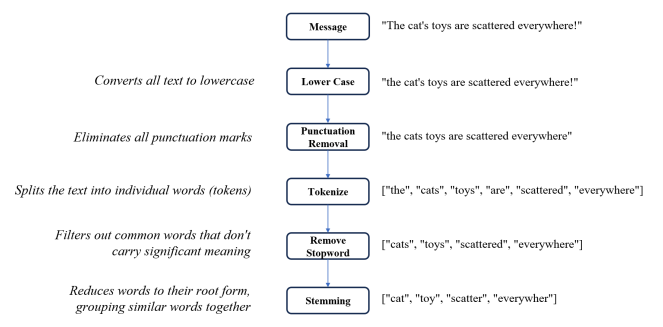

In [24]:
def lowercase(text):
    return text.lower()


def punctuation_removal(text):
    # Create a dictionary of "key: value" as a replace from "key" to "value"
    translator = str.maketrans("", "", string.punctuation)  
    
    return text.translate(translator)


def tokenize(text):
    return nltk.word_tokenize(text)
    
    
def remove_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words("english")
    
    return [token for token in tokens if token not in stop_words]
    
    
def stemming(tokens):
    stemmer = nltk.PorterStemmer()
    
    return [stemmer.stem(token) for token in tokens]

In [25]:
def preprocess_text(text):
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    
    return tokens

In [26]:
messages = [preprocess_text(message) for message in messages]

In [29]:
messages[0]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

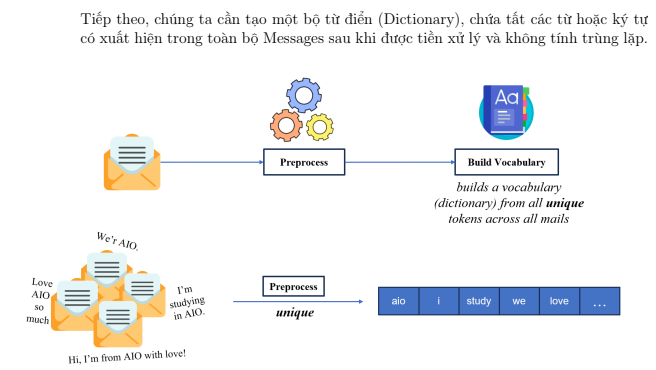

In [27]:
def create_dictionary(messages):
    dictionary = []
    
    for tokens in messages:
        for token in tokens:
            if token not in dictionary:
                dictionary.append(token)
    
    return dictionary

In [30]:
dictionary = create_dictionary(messages)
dictionary

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 '87121',
 'receiv',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'dun',
 'say',
 'earli',
 'hor',
 'c',
 'alreadi',
 'nah',
 'dont',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'xxx',
 'std',
 'chg',
 'send',
 '£150',
 'rcv',
 'even',
 'brother',
 'speak',
 'treat',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '£900',
 'prize',
 'reward',
 'claim',
 'call',
 '0

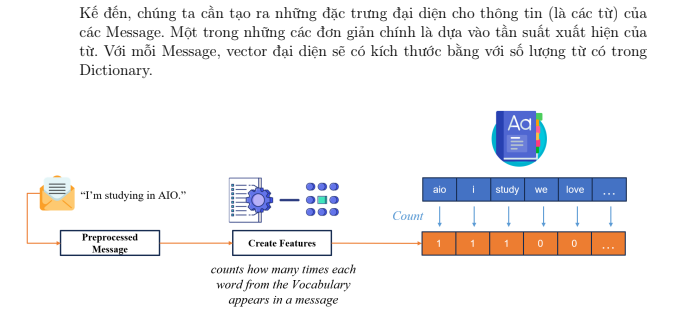

In [31]:
def create_features(tokens, dictionary):
    features = np.zeros(len(dictionary))
    
    for token in tokens:
        if token in dictionary:
            features[dictionary.index(token)] += 1
        
    return features

In [66]:
X = np.array([create_features(tokens, dictionary) for tokens in messages])

In [67]:
le = LabelEncoder()
y = le.fit_transform(labels)

print(f"Classes: {le.classes_}")
print(f"Encoded labels: {y}")

Classes: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


# **5. Splitting train/val/test set**

In [68]:
VAL_SIZE = 0.2
TEST_SIZE = 0.125
SEED = 42

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=VAL_SIZE,
                                                  shuffle=True,
                                                  random_state=SEED)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                test_size=TEST_SIZE,
                                                shuffle=True,
                                                random_state=SEED)

In [70]:
print(len(X_train), len(X_val), len(X_test))

3899 1115 558


# **6. Training**

In [71]:
model = GaussianNB()
print("Start training ...")
model = model.fit(X_train, y_train)
print("Training completed!")

Start training ...
Training completed!


# **7. Evaluate model**

In [72]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Val accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Val accuracy: 0.8753363228699551
Test accuracy: 0.8924731182795699


## **8. Predict on test data**

In [73]:
def predict(text, model, dictionary):
    processed_text = preprocess_text(text)
    features = create_features(processed_text, dictionary)
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    prediction_cls = le.inverse_transform(prediction)[0]
    
    return prediction_cls

In [74]:
test_input = "I am so ugly"
prediction_cls = predict(test_input, model, dictionary)
print(f"Prediction: {prediction_cls}")

Prediction: spam


In [75]:
q8_text = ["Pho", "is", "a", "popular", "Vietnamese", "noodle", "soup"]
result = remove_stopwords(q8_text)
print(result)

['Pho', 'popular', 'Vietnamese', 'noodle', 'soup']
